In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.decomposition import PCA

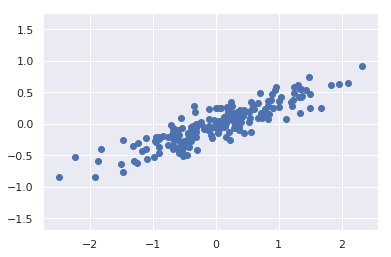

In [2]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

In [114]:
# giam chieu du lieu ve 2 chieu
pca_random=PCA(n_components=2)
X_pca=pca_random.fit_transform(X)

In [115]:
#component_ la ma tran vecto cua cac truc
print(X2D.shape)
print(pca_random.components_.shape)

(200, 2)
(2, 2)


In [14]:
#explained_variance the hien do quan trong cua cac truc
print(pca.explained_variance_)
#explained_variance_ratio: phan tram cac diem duoc chieu len cac truc PC
print(pca.explained_variance_ratio_)

[0.7625315 0.0184779]
[0.97634101 0.02365899]


In [28]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
    linewidth=2,
    color='blue',
    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

gia tri cua lenth va vector 0.7625315008826115 [-0.94446029 -0.32862557]
gia tri cua pca.mean [ 0.03351168 -0.00408072]
gia tri cua lenth va vector 0.018477895513562572 [-0.32862557  0.94446029]
gia tri cua pca.mean [ 0.03351168 -0.00408072]


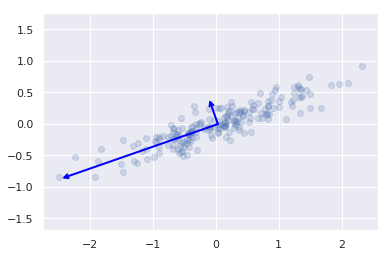

In [29]:
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    print("gia tri cua lenth va vector",length,vector)
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
    print("gia tri cua pca.mean",pca.mean_)
plt.axis('equal');

In [31]:
#cách 1
pcanew=PCA(n_components=0.95)
X_reduced=pcanew.fit_transform(X)

In [32]:
print(pcanew.n_components_)

1


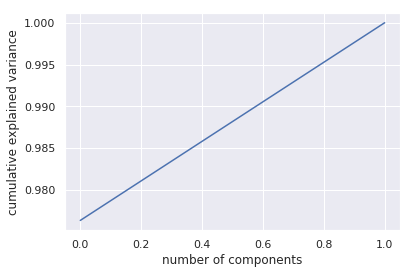

In [38]:
#cách 2
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [33]:
pca = PCA(n_components=1)
X_pca=pca.fit_transform(X)
print("original shape:", X.shape)
print("transformed shape:", X_pca.shape)

original shape: (200, 2)
transformed shape: (200, 1)


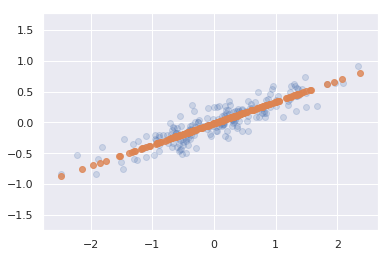

In [37]:
#ham inverse_transform chuyen du lieu ve chieu nhu cu
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

# Ứng dung trong việc loc nhiễu của ảnh

Ta sẽ tạo nhiễu cho chữ viết bằng tay và sau đó lọc nhiễu

In [39]:
from sklearn.datasets import load_digits

In [40]:
digits=load_digits()
digits.data.shape

(1797, 64)

In [112]:
print(digits.images.shape)

(1797, 8, 8)


In [42]:
print(digits.target)
print(digits.target_names)

[0 1 2 ... 8 9 8]
[0 1 2 3 4 5 6 7 8 9]


In [45]:
pca_digits=PCA(2)
X_projected=pca_digits.fit_transform(digits.data)
print(X_projected.shape)

(1797, 2)


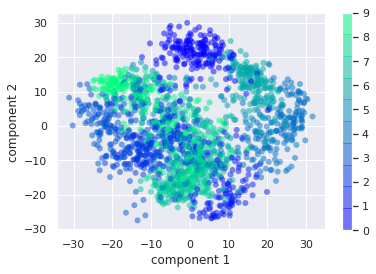

In [47]:
plt.scatter(X_projected[:, 0], X_projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('winter', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

In [48]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
    subplot_kw={'xticks':[], 'yticks':[]},
    gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))

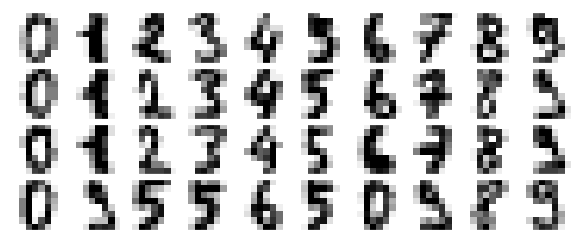

In [49]:
plot_digits(digits.data)

(64,)


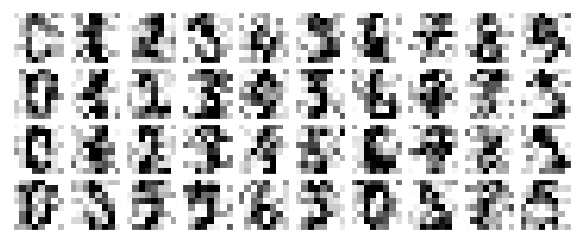

In [61]:
np.random.seed(42)
noisy=np.random.normal(digits.data,5)
print(noisy[0].shape)
plot_digits(noisy)

In [71]:
pca_noisy=PCA(0.55).fit(noisy)

In [99]:
print(pca_noisy.n_components_)
print(pca_noisy.components_.shape)

19
(19, 64)


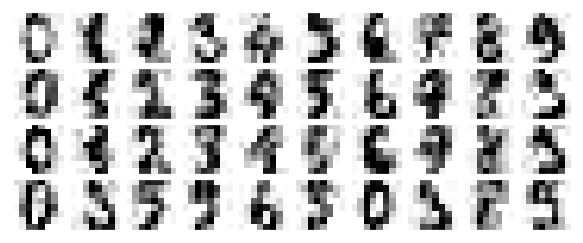

In [72]:
data_component=pca_noisy.transform(noisy)
digit_filtered=pca_noisy.inverse_transform(data_component)
plot_digits(digit_filtered)

In [97]:
print(data_component.shape)

(1797, 19)


# TEST TRÊN DỮ LIỆU LFW

In [78]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)
print(faces.target.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)
(1348,)


Ta giảm chiều ảnh xuống 150 chiều

In [85]:
from sklearn.decomposition import PCA
pca=PCA(150)
pca.fit(faces.data)

PCA(copy=True, iterated_power='auto', n_components=150, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [100]:
print(pca.components_.shape)
#co 150 chieu anh, 1 chieu co 2914 diem chieu cua pixel anh

(150, 2914)


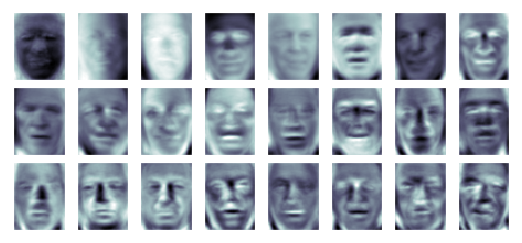

In [90]:
#plot 1 vai chieu dau cua anh 
fig,axes=plt.subplots(3,8,figsize=(9,4),
                      subplot_kw={'xticks':[], 'yticks':[]},
                      gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i,ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62,47),cmap="bone")

In [118]:
print(pca.components_[0].reshape(62,47))

[[-0.00583595 -0.00599674 -0.00619078 ... -0.00802413 -0.00778724
  -0.00780769]
 [-0.00591043 -0.00609998 -0.00650916 ... -0.00840447 -0.00815466
  -0.00829579]
 [-0.00627931 -0.00662396 -0.00720231 ... -0.00887686 -0.0083982
  -0.00879604]
 ...
 [-0.00272141 -0.00279691 -0.00374624 ... -0.01046187 -0.0089694
  -0.00818909]
 [-0.00301703 -0.00334014 -0.00396878 ... -0.0101486  -0.00875351
  -0.00802311]
 [-0.00333608 -0.00365479 -0.00459357 ... -0.0099781  -0.0089769
  -0.00806945]]


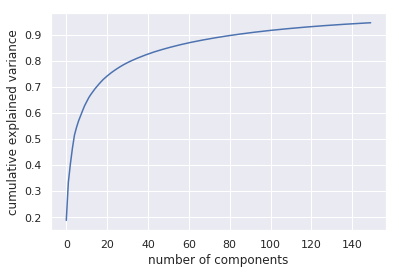

In [102]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [103]:
# giảm chiều ảnh trả lại chiều ảnh cũ ban đầu=PCA
image_component=pca.transform(faces.data)
image_inverse=pca.inverse_transform(image_component)

In [109]:
print(image_component.shape)
print(image_inverse.shape)
print(faces.data.shape)
print(faces.images.shape)

(1348, 150)
(1348, 2914)
(1348, 2914)
(1348, 62, 47)


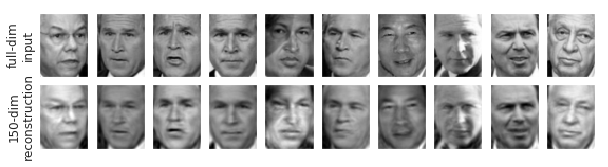

In [104]:
#vẽ ảnh ra để so sánh
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
subplot_kw={'xticks':[], 'yticks':[]},
gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(image_inverse[i].reshape(62, 47), cmap='binary_r')
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('150-dim\nreconstruction');

Giảm chiều của số viết tay